# Wykresiki

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def load_scifi_table(table_name):
    scifi_path = os.path.join("data", "scifi.stackexchange.com")
    return pd.read_csv(os.path.join(scifi_path, table_name + ".csv"))

In [4]:
Posts = load_scifi_table("Posts")
Tags = load_scifi_table("Tags")

In [5]:
Posts.Tags.str.split('><')

0                                      [<novel, languages>]
1                                       [<vorkosigan-saga>]
2                                     [<total-recall-2070>]
3                                                       NaN
4                                                       NaN
5                             [<star-trek, star-trek-2009>]
6                                              [<the-road>]
7                              [<movie, tv, philip-k-dick>]
8                                                       NaN
9                                                       NaN
10                            [<star-trek, uss-enterprise>]
11                                                      NaN
12                                             [<the-road>]
13                                           [<twin-peaks>]
14                                                      NaN
15                                                      NaN
16        [<star-trek, canon, star-trek-

In [6]:
Tags.head()

,Unnamed: 0,Count,ExcerptPostId,Id,TagName,WikiPostId
0,0,225,1813.0,2,languages,1812.0
1,1,285,2478.0,7,robots,2477.0
2,2,4319,1776.0,10,star-trek,1775.0
3,3,7,3098.0,11,prediction,3097.0
4,4,281,2548.0,12,technology,2547.0


In [7]:
Tags_ordered = Tags.sort_values("Count", ascending=False)
Tags_ordered.head()

,Unnamed: 0,Count,ExcerptPostId,Id,TagName,WikiPostId
47,47,12565,1811.0,130,story-identification,1810.0
168,168,5694,2679.0,533,harry-potter,2678.0
21,21,5305,1970.0,44,star-wars,1969.0
2,2,4319,1776.0,10,star-trek,1775.0
225,225,3352,4872.0,695,marvel,4871.0


<BarContainer object of 10 artists>

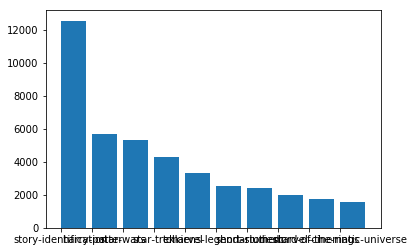

In [96]:
plt.bar(Tags_ordered.TagName[:10], Tags_ordered.Count[:10], align='edge')

https://scifi.stackexchange.com/questions/tagged/story-identification

Tag story-identification oznacza, że pytanie jest o jakiś film/książkę, o którym autor pytania coś pamięta, ale nie potrafi sobie przypomnić tyułu.

In [9]:
Tags_list = Posts.Tags.str.split("><")

In [10]:
Tags_list = Tags_list.map(lambda x: [tag.replace("<", "").replace(">", "") for tag in x], na_action='ignore')
Tags_list.head()

0     [novel, languages]
1      [vorkosigan-saga]
2    [total-recall-2070]
3                    NaN
4                    NaN
Name: Tags, dtype: object

In [18]:
sf_story_index = Posts.loc[:,"Tags"].str.contains("story-identification").rename("story_identification")\
.reset_index().query("story_identification == True").loc[:,"index"]

Tags_story_identification = Tags_list.loc[sf_story_index]

In [19]:
Tags_story_identification

92                                   [story-identification]
95                            [novel, story-identification]
148                       [languages, story-identification]
166          [story-identification, aliens, space, warfare]
233                                  [story-identification]
286                    [story-identification, isaac-asimov]
302       [story-identification, novel, technology, spac...
377                 [story-identification, generation-ship]
379                    [story-identification, ray-bradbury]
487       [story-identification, aliens, short-stories, ...
508                   [story-identification, short-stories]
576       [story-identification, aliens, alien-invasion,...
588                                  [story-identification]
593                           [movie, story-identification]
656           [story-identification, dystopia, young-adult]
693                           [story-identification, novel]
739                [story-identification

In [26]:
Posts.loc[148,].Body

"<p>I remember reading what I believe is a short story about a brother and sister who somehow come into possession of some toys which turn out to be from aliens. Through playing with them they develop a language their parents can't understand and start to develop mentally far faster than any human.  </p>\n\n<p>Does anyone recognize this story, or remember who wrote it or what it's called?  </p>\n"

Chcemy sprawdzić ile pytań o story identification jest o film a ile o książkę.

In [67]:
reading = {"book", "novel"}
movies = {"movie", "tv", "video"}

In [68]:
is_reading = Posts.loc[sf_story_index, "Tags"].map(lambda x: any(tag in x for tag in reading), na_action='ignore')
is_movies = Posts.loc[sf_story_index, "Tags"].map(lambda x: any(tag in x for tag in movies), na_action='ignore')

In [69]:
is_reading.sum()

2521

In [70]:
is_movies.sum()

1406

<BarContainer object of 2 artists>

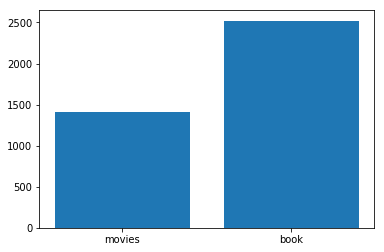

In [71]:
plt.bar(["movies", "book"], [is_movies.sum(), is_reading.sum()])

Dorysujemy na czerwono 

In [72]:
len(sf_story_index)/len(Posts)

0.08126426894495502

In [75]:
(is_reading.sum() + is_movies.sum()) / len(sf_story_index)

0.3125348189415042

Okazuje się, że pominęliśmy większość postów ze story-identification. Żeby osiągnąć bardziej wiarygodne wyniki przydałoby się przeglądać tytuły postów, albo nawet ich treść.

In [76]:
is_reading = Posts.loc[sf_story_index, "Tags"].map(lambda x: any(tag in x for tag in reading), na_action='ignore')
is_movies = Posts.loc[sf_story_index, "Tags"].map(lambda x: any(tag in x for tag in movies), na_action='ignore')

In [78]:
story_Posts = Posts.loc[sf_story_index]

In [90]:
# Story Identification questions with title contatining reading words
reading_title_story = story_Posts.loc[story_Posts.Title.map(lambda x: any(tag in x for tag in reading))]

# Story Identification questions with title contatining movies words
movies_title_story = story_Posts.loc[story_Posts.Title.map(lambda x: any(tag in x for tag in movies))]

In [91]:
len(reading_title_story), len(movies_title_story)

(2922, 1006)

In [88]:
# Story Identification questions with Body contatining reading words
reading_body_story = story_Posts.loc[story_Posts.Body.map(lambda x: any(tag in x for tag in reading))]

# Story Identification questions with Body contatining movies words
movies_body_story = story_Posts.loc[story_Posts.Body.map(lambda x: any(tag in x for tag in movies))]

In [89]:
len(reading_body_story), len(movies_body_story)

(6037, 1765)

Mamy już pewność, że pytania o ksiązki są częściej zadawane (TODO: można zastanowić się czy słowa które napisaliśmy sa wystarczająco wyczerpujące). Teraz zastanówmy się na ile procent użytkownicy znajdują odpowiedzi w zależności od tego czy pytają o książki czy o filmy.

In [94]:
len(reading_title_story[reading_title_story.AcceptedAnswerId.notnull()]) / len(reading_title_story)

0.39664613278576316

In [95]:
len(movies_title_story[movies_title_story.AcceptedAnswerId.notnull()]) / len(movies_title_story)

0.4254473161033797